In [113]:
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib.patches import Patch
import seaborn as sns 
sns.set()

In [114]:

df = pd.read_csv ('33000-BORDEAUX_nettoye.csv')

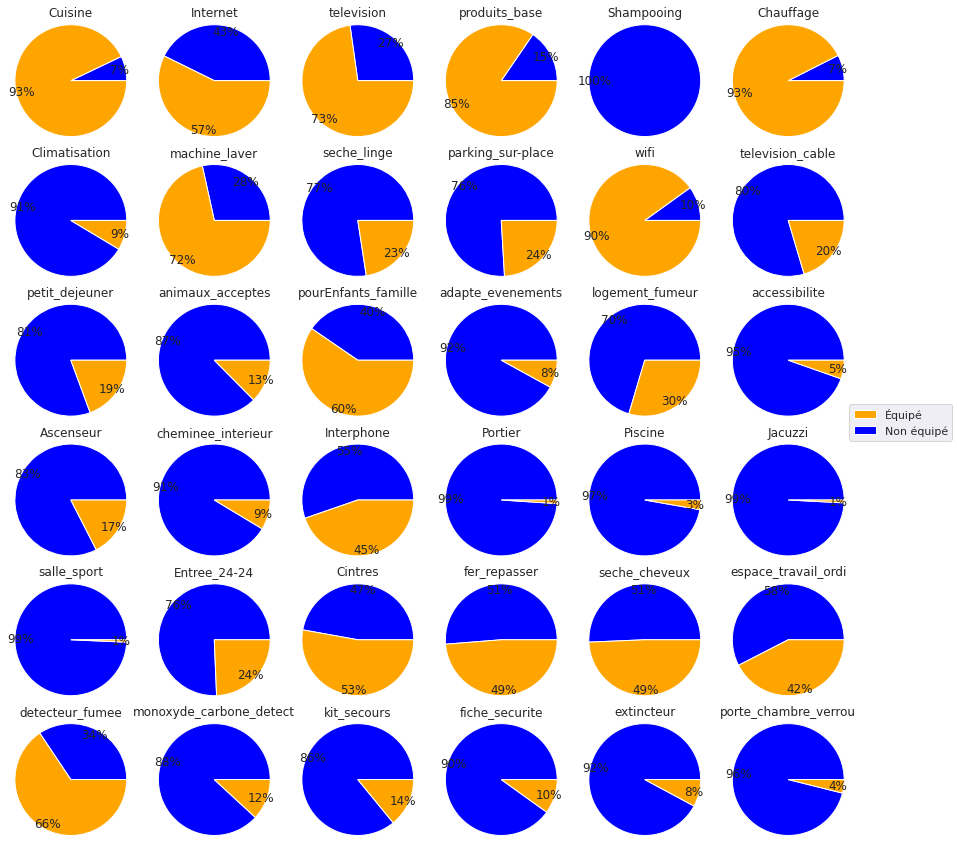

In [115]:

rows = 6
columns = 6
fig= plt.figure(figsize=(15, 15))
index_fig = 0
for i in df.columns:
    if df[i].dtypes == 'int64':
        if df[i].describe()["max"] == 1 or df[i].describe()["max"] == 0:
            index_fig+=1
            description_dict = {}
            for j in range(len(df[i])):
                try:
                    description_dict[df[i][j]]+=1
                except :
                    description_dict[df[i][j]] = 1
            description_dict = {k: v for k, v in sorted(description_dict.items(), key=lambda item: item[0])}
            labels_propriete = list(description_dict.keys())
            values_propriete = list(description_dict.values())
            fig.add_subplot(rows, columns, index_fig)
            plt.title(i)
            plt.pie(values_propriete, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2, colors = ['blue', 'orange'])
legend_elements = [Patch(facecolor='orange',label='Équipé'),Patch(facecolor='blue',label='Non équipé')]
fig.legend(handles=legend_elements, loc='right')
plt.show()


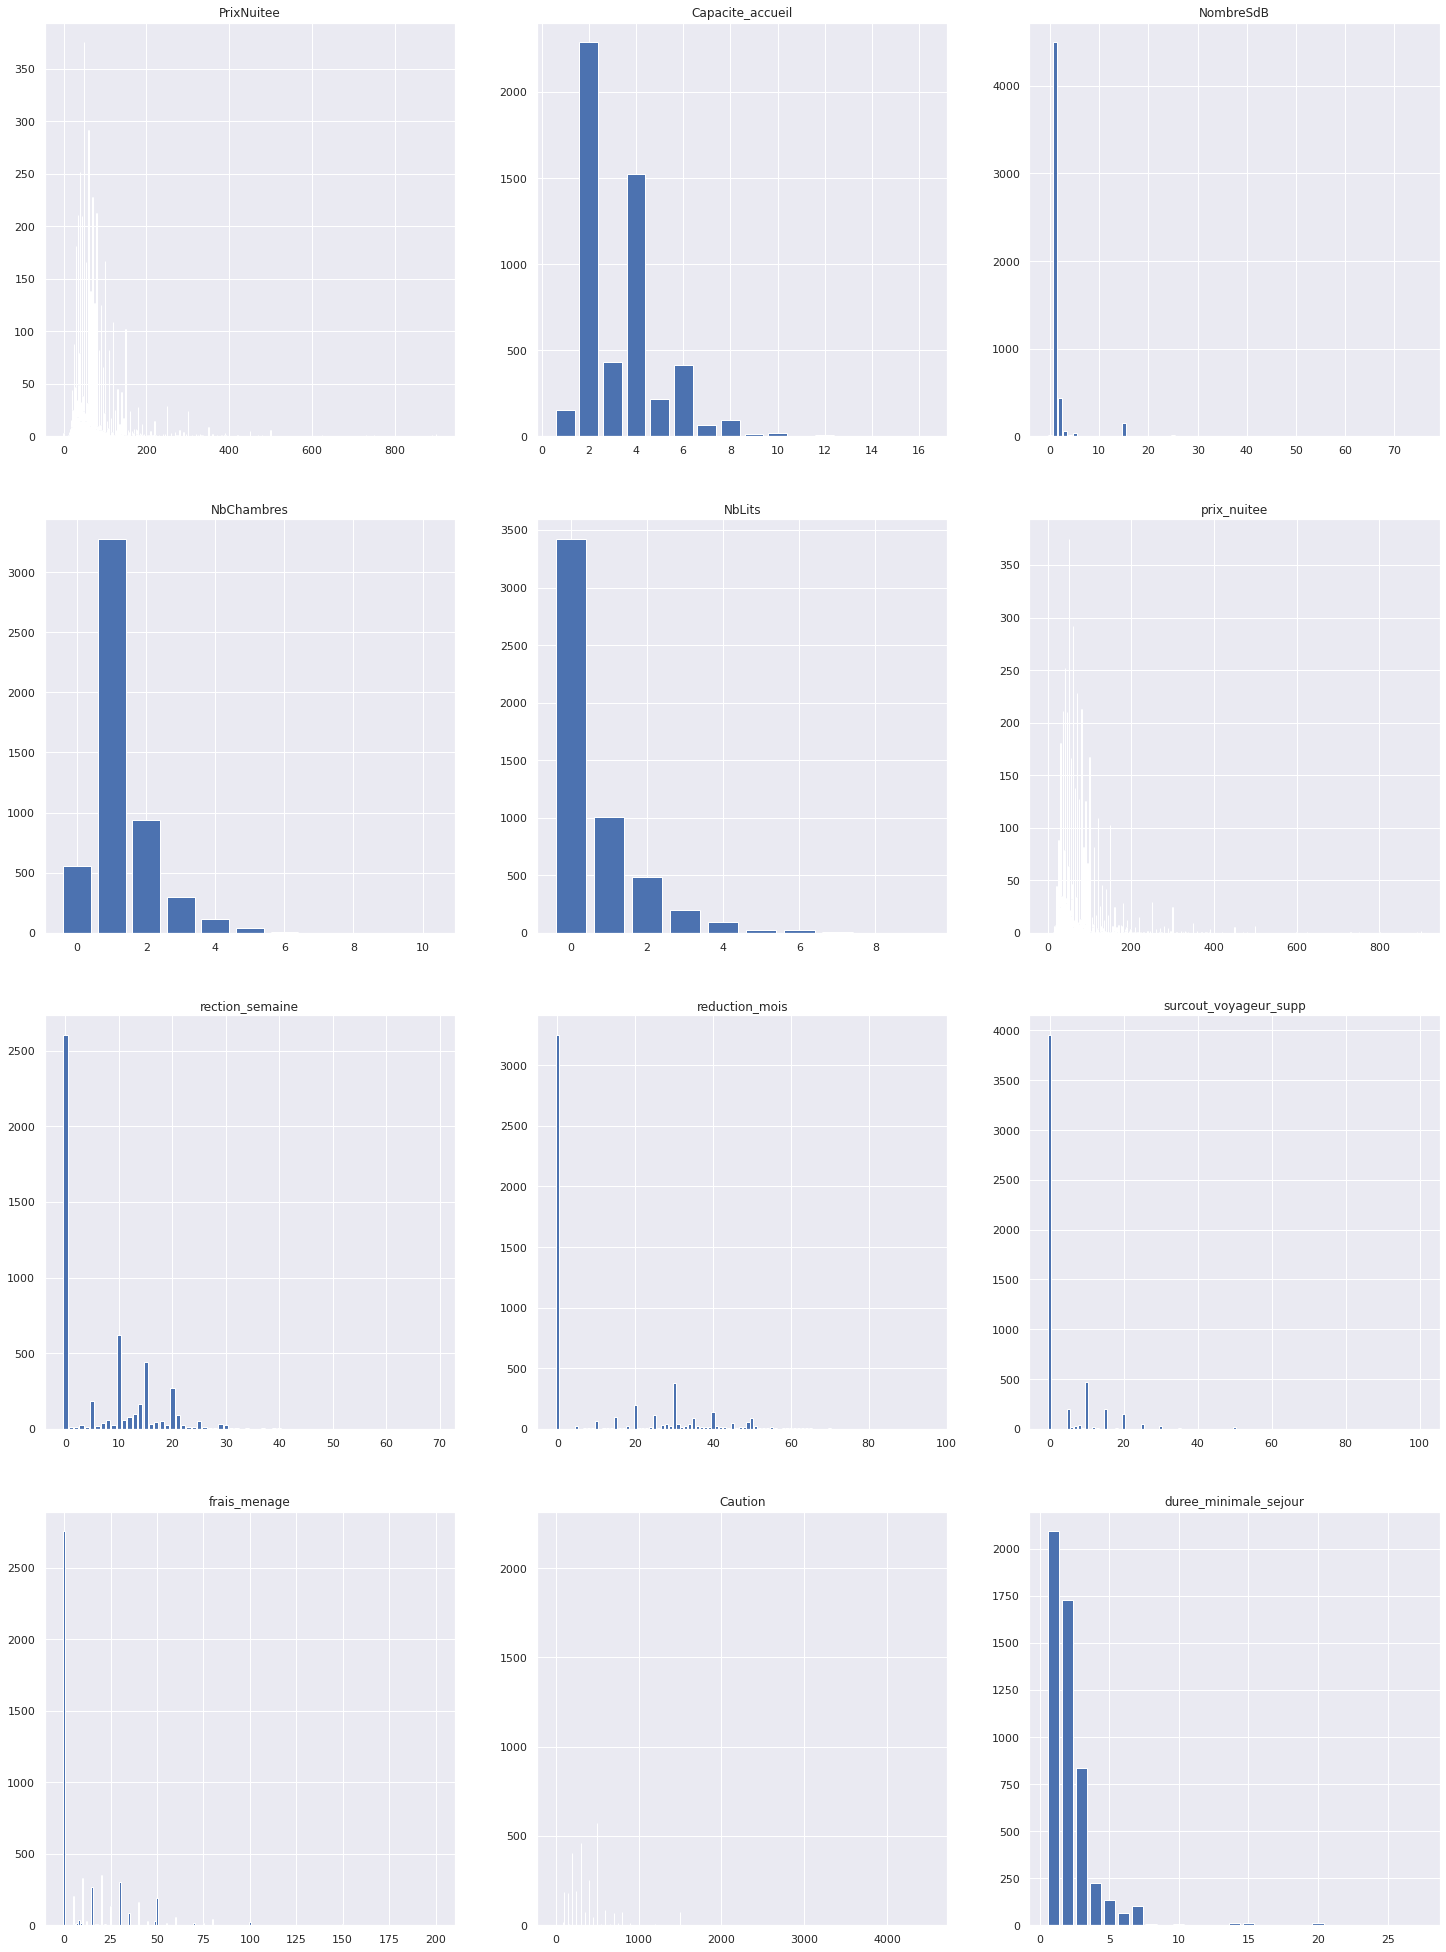

In [116]:
rows = 4
columns = 3
fig2 = plt.figure(figsize=(25, 35))
index_fig = 0
for i in df.columns:
    if df[i].dtypes == 'int64':
        if df[i].describe()["max"] != 1 and i != 'Shampooing' and i != 'Identifiant':
            index_fig+=1
            description_dict = {}
            for j in range(len(df[i])):
                try:
                    description_dict[df[i][j]]+=1
                except :
                    description_dict[df[i][j]] = 1
                
            labels_propriete = list(description_dict.keys())
            values_propriete = list(description_dict.values())
            fig2.add_subplot(rows, columns, index_fig)
            plt.title(i)
            plt.bar(labels_propriete, values_propriete)
plt.show()


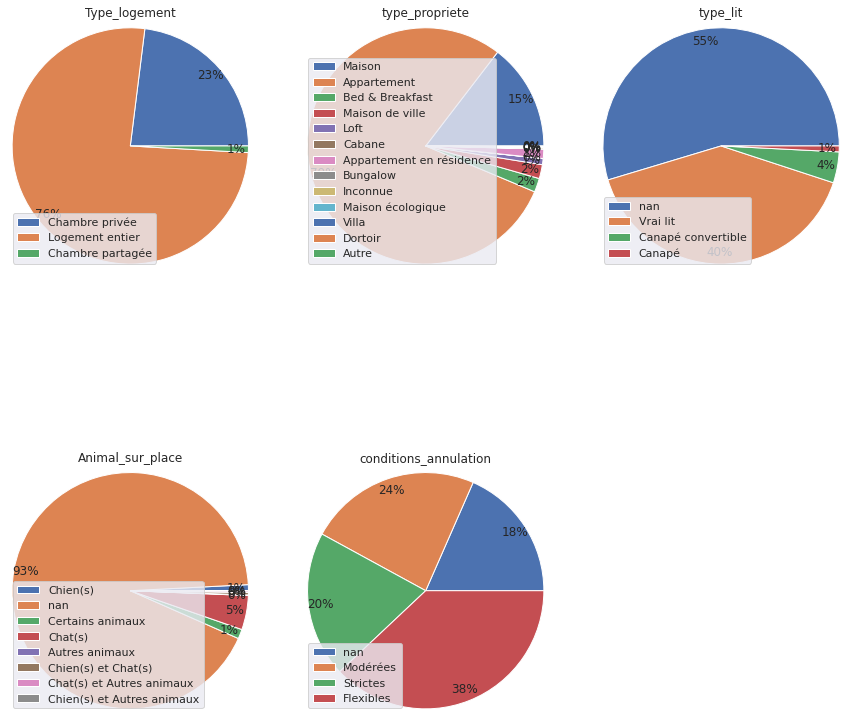

In [117]:
rows = 2
columns = 3
fig= plt.figure(figsize=(15, 15))
index_fig = 0
for i in df.columns:
    if df[i].dtypes == 'object':
        if i != 'Url' and i != 'Resume' and i != 'Titre' and i != 'Description' and i != 'reglement_interieur':
            index_fig+=1
            description_dict = {}
            for j in range(len(df[i])):
                try:
                    description_dict[df[i][j]]+=1
                except :
                    description_dict[df[i][j]] = 1
            labels_propriete = list(description_dict.keys())
            values_propriete = list(description_dict.values())
            fig.add_subplot(rows, columns, index_fig)
            plt.title(i)
            plt.pie(values_propriete, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
            plt.legend(labels_propriete, loc= 'lower left')
plt.show()

In [118]:
description_prix_nuit = df['PrixNuitee'].describe()

In [119]:
print(description_prix_nuit)
pr_max=description_prix_nuit["75%"]

count    5237.000000
mean       76.243078
std        62.878115
min         0.000000
25%        40.000000
50%        60.000000
75%        90.000000
max       900.000000
Name: PrixNuitee, dtype: float64


Prix moyen de la nuitée 76.2 €
Prix maximum de la nuitée 900.0 €
Prix minimum de la nuitée 0.0 €
Écart type du prix de la nuitée 62.9 €


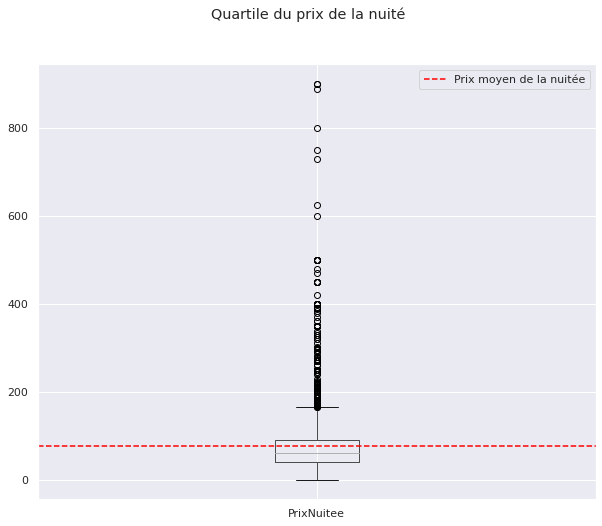

In [120]:

print("Prix moyen de la nuitée " + str(round(description_prix_nuit["mean"],1))+ " €")
print("Prix maximum de la nuitée " + str(description_prix_nuit["max"]) + " €")
print("Prix minimum de la nuitée " + str(description_prix_nuit["min"]) + " €")
print("Écart type du prix de la nuitée " + str(round(description_prix_nuit["std"],1)) + " €")
fig = plt.figure()
fig.suptitle("Quartile du prix de la nuité")
fig.set_figwidth(10)
fig.set_figheight(8)
boxplot = df.boxplot(column=['PrixNuitee'])
line_mean = plt.axhline(y=description_prix_nuit["mean"],color='red',linestyle='--', label = 'Prix moyen de la nuitée')
plt.legend(loc ='upper right')
boxplot.plot()
plt.show()

In [121]:
to_drop = []


for i in range( len( df['PrixNuitee'] )):
    if df['PrixNuitee'][i]<pr_max:
        to_drop.append(i)

df_only_hight_price = df.drop(to_drop)

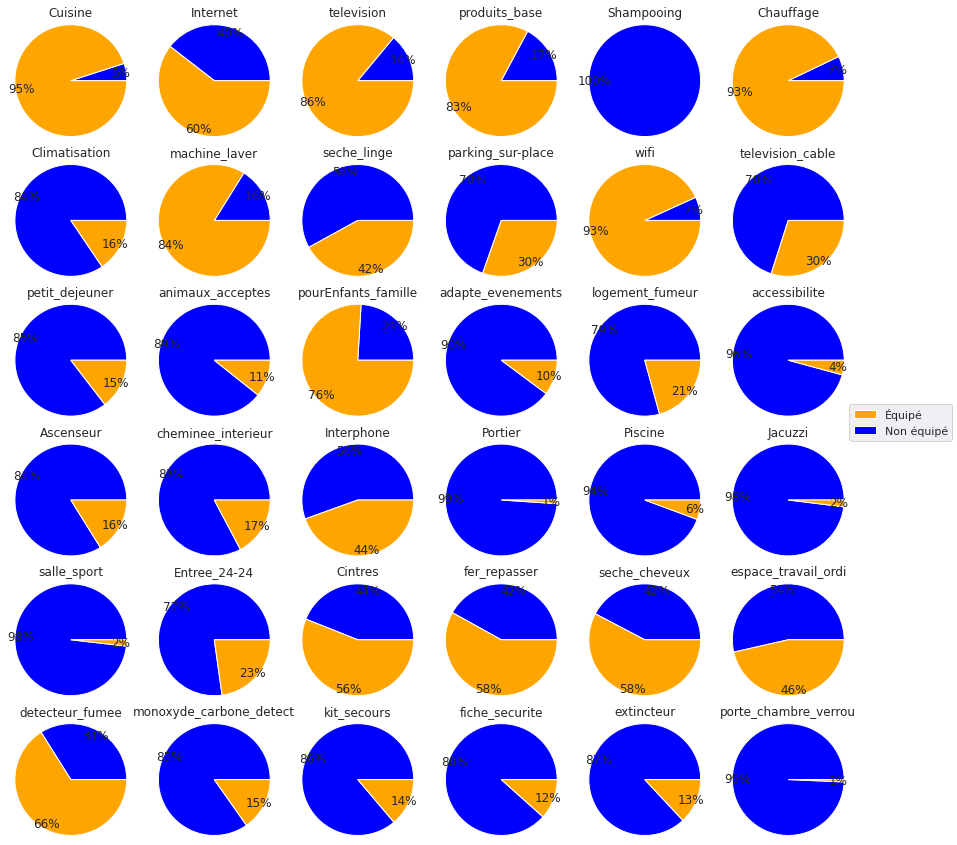

In [122]:

rows = 6
columns = 6
fig= plt.figure(figsize=(15, 15))
index_fig = 0
for i in df_only_hight_price.columns:
    if df_only_hight_price[i].dtypes == 'int64':
        if df_only_hight_price[i].describe()["max"] == 1 or df_only_hight_price[i].describe()["max"] == 0:
            index_fig+=1
            description_dict = {}
            for j in range(len(df_only_hight_price[i])):
                try:
                    description_dict[df_only_hight_price[i].iloc[j]]+=1
                except KeyError:
                    description_dict[df_only_hight_price[i].iloc[j]] = 1
            description_dict = {k: v for k, v in sorted(description_dict.items(), key=lambda item: item[0])}
            labels_propriete = list(description_dict.keys())
            values_propriete = list(description_dict.values())
            fig.add_subplot(rows, columns, index_fig)
            plt.title(i)
            plt.pie(values_propriete, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2, colors = ['blue', 'orange'])
legend_elements = [Patch(facecolor='orange',label='Équipé'),Patch(facecolor='blue',label='Non équipé')]
fig.legend(handles=legend_elements, loc='right')
plt.show()


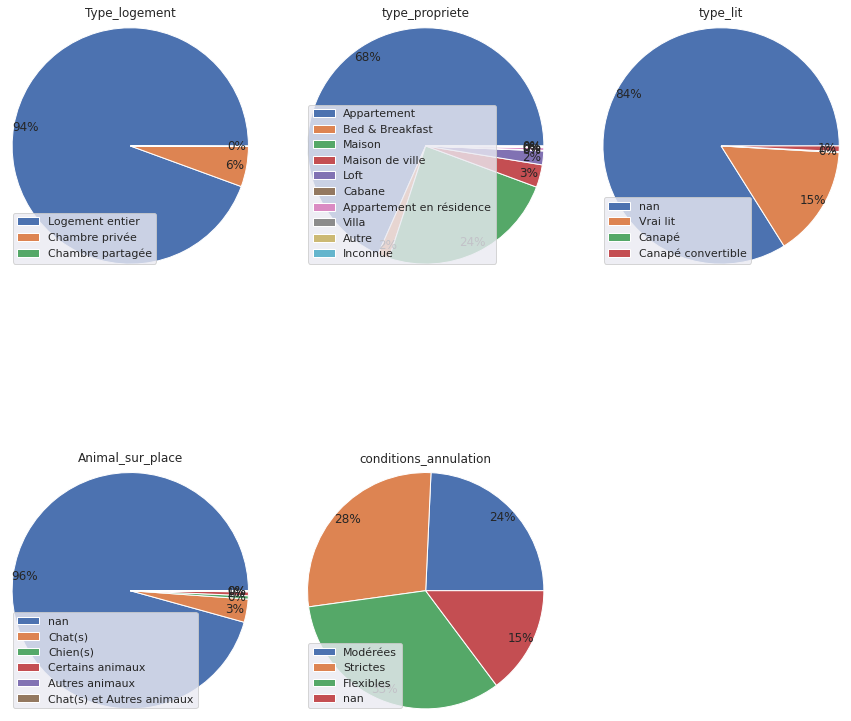

In [123]:
rows = 2
columns = 3
fig= plt.figure(figsize=(15, 15))
index_fig = 0
for i in df.columns:
    if df_only_hight_price[i].dtypes == 'object':
        if i != 'Url' and i != 'Resume' and i != 'Titre' and i != 'Description' and i != 'reglement_interieur':
            index_fig+=1
            description_dict = {}
            for j in range(len(df_only_hight_price[i])):
                try:
                    description_dict[df_only_hight_price[i].iloc[j]]+=1
                except :
                    description_dict[df_only_hight_price[i].iloc[j]] = 1
            labels_propriete = list(description_dict.keys())
            values_propriete = list(description_dict.values())
            fig.add_subplot(rows, columns, index_fig)
            plt.title(i)
            plt.pie(values_propriete, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
            plt.legend(labels_propriete, loc= 'lower left')

In [124]:
to_drop = []


for i in range( len( df['PrixNuitee'] )):
    if df['PrixNuitee'][i]>pr_max:
        to_drop.append(i)

df_only_mean_price = df.drop(to_drop)

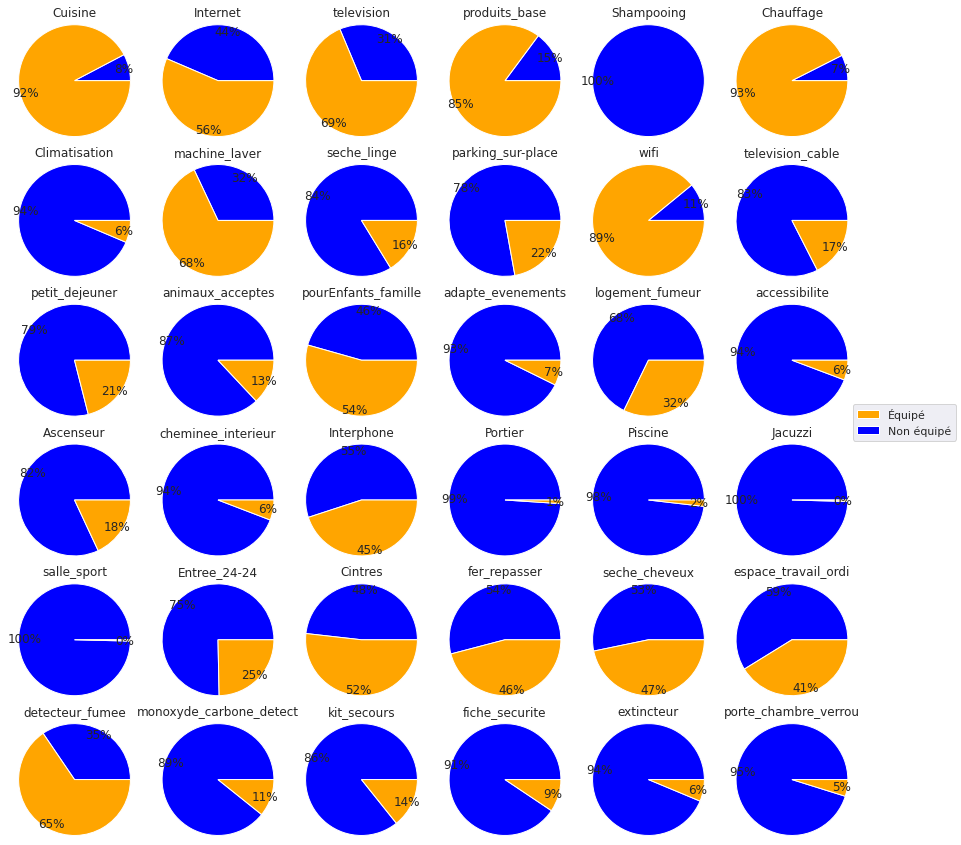

In [125]:
rows = 6
columns = 6
fig= plt.figure(figsize=(15, 15))
index_fig = 0
for i in df_only_mean_price.columns:
    if df_only_mean_price[i].dtypes == 'int64':
        if df_only_mean_price[i].describe()["max"] == 1 or df_only_mean_price[i].describe()["max"] == 0:
            index_fig+=1
            description_dict = {}
            for j in range(len(df_only_mean_price[i])):
                try:
                    description_dict[df_only_mean_price[i].iloc[j]]+=1
                except KeyError:
                    description_dict[df_only_mean_price[i].iloc[j]] = 1
            description_dict = {k: v for k, v in sorted(description_dict.items(), key=lambda item: item[0])}
            labels_propriete = list(description_dict.keys())
            values_propriete = list(description_dict.values())
            fig.add_subplot(rows, columns, index_fig)
            plt.title(i)
            plt.pie(values_propriete, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2, colors = ['blue', 'orange'])
legend_elements = [Patch(facecolor='orange',label='Équipé'),Patch(facecolor='blue',label='Non équipé')]
fig.legend(handles=legend_elements, loc='right')
plt.show()

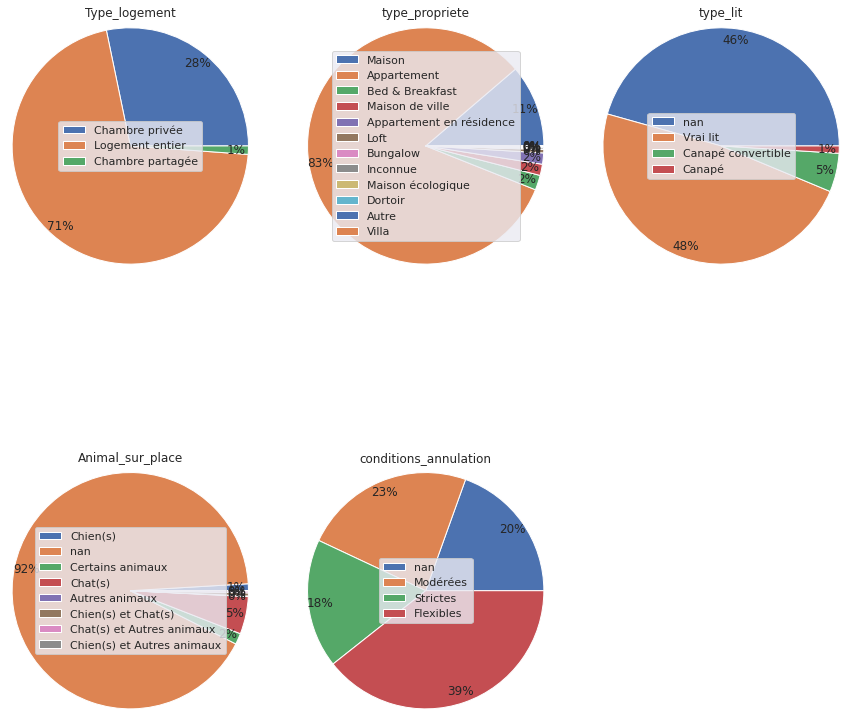

In [126]:
rows = 2
columns = 3
fig= plt.figure(figsize=(15, 15))
index_fig = 0
for i in df.columns:
    if df_only_mean_price[i].dtypes == 'object':
        if i != 'Url' and i != 'Resume' and i != 'Titre' and i != 'Description' and i != 'reglement_interieur':
            index_fig+=1
            description_dict = {}
            for j in range(len(df_only_mean_price[i])):
                try:
                    description_dict[df_only_mean_price[i].iloc[j]]+=1
                except :
                    description_dict[df_only_mean_price[i].iloc[j]] = 1
            labels_propriete = list(description_dict.keys())
            values_propriete = list(description_dict.values())
            fig.add_subplot(rows, columns, index_fig)
            plt.title(i)
            plt.pie(values_propriete, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
            plt.legend(labels_propriete, loc= 'center')

In [127]:
for i in range(len(df['PrixNuitee'])):
    if df['PrixNuitee'][i] == 0:
        print(i)

4327
4416
5111


In [128]:
number_of_ojects = 0
for i in df.columns:
    if df[i].dtypes == 'object':
        number_of_ojects+=1
print(number_of_ojects)

10


In [129]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [130]:
features = []
for i in df.columns:
    if df[i].dtypes == 'int64':
        if df[i].describe()["max"] == 1 or df[i].describe()["max"] == 0:
            features.append(i)

In [131]:
X = df[features]
y = df['PrixNuitee']

0.19922799763409849
      y_true      y_pred
3075     130   78.685868
1268      60   97.976470
422       80  103.973406
2543      50   52.654110
2842      35   69.378779
...      ...         ...
30       218  161.634452
725      330   42.026932
3076      20   54.567828
2292      81   40.758272
5158      25   62.617760

[1729 rows x 2 columns]


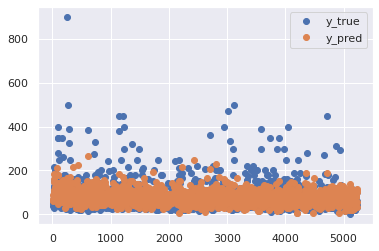

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
results = pd.DataFrame({'y_true':y_test,'y_pred':y_pred.ravel()})
print(regr.score(X_test, y_test))
results.plot(style='o')
print(results)

In [133]:
to_drop_X = []
to_drop_y = []

for i in range(len(y)):
    if y[i]>pr_max:
        to_drop_X.append(X.index[i])
        to_drop_y.append(y.index[i])
X_lisse = X.drop(to_drop_X)
y_lisse = y.drop(to_drop_y)       

0.11695728011738238
      y_true      y_pred
3075     130   78.685868
1268      60   97.976470
422       80  103.973406
2543      50   52.654110
2842      35   69.378779
...      ...         ...
30       218  161.634452
725      330   42.026932
3076      20   54.567828
2292      81   40.758272
5158      25   62.617760

[1729 rows x 2 columns]


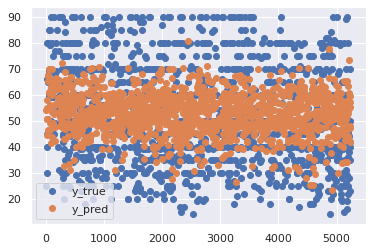

In [134]:
X_train_lisse, X_test_lisse, y_train_lisse, y_test_lisse = train_test_split(X_lisse, y_lisse, test_size=0.33, random_state=42)
regr_lisse = linear_model.LinearRegression()
regr_lisse.fit(X_train_lisse, y_train_lisse)
y_pred_lisse = regr_lisse.predict(X_test_lisse)
results_lisse = pd.DataFrame({'y_true':y_test_lisse,'y_pred':y_pred_lisse.ravel()})
results_lisse.plot(style='o')
print(regr_lisse.score(X_test_lisse, y_test_lisse))
print(results)

In [135]:
for i in range (10):
    print('Anas me vois tu ?')

Anas me vois tu ?
Anas me vois tu ?
Anas me vois tu ?
Anas me vois tu ?
Anas me vois tu ?
Anas me vois tu ?
Anas me vois tu ?
Anas me vois tu ?
Anas me vois tu ?
Anas me vois tu ?
